# İş Uygulaması: ML Modelinin Başarı Testi (Bağımsız İki Örneklem Testi)

* Problem: Bir ML projesine yatırım yapılmış ürettiği tahminler neticesinde oluşan gelir ile eski sistemin ürettiği gelirler karşılaştırılıp farklılık olup olmadığı test edilmek isteniyor.
* Detay: 1-Model geliştirilmiş ve web sitesine entegre edilmiş 2-Site kullanıcıları belirli bir kurala göre ikiye bölünmüş olsun 3-A grubu eski B grubu yeni sistem 4-Gelir anlamında anlamlı bir iş yapılıp yapılmadığı test ediliyor

* H0: M1=M2
* H1: M1 != M2      

### VERI TIPI I 

In [3]:
import pandas as pd
import numpy as np
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])
B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])
A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


#### Gerçek hayatta verinin geldiği şekil bu testi yapmamıza izin vermeyecektir veriyi dönüştürmemiz gerekecektir

### VERI TIPI II

In [6]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])
B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])
#A ve A nın grubu
GRUP_A = np.arange(len(A)) #A nın içinde yer alan sayı kadar GRUP_A oluşturucak
GRUP_A = pd.DataFrame(GRUP_A) #Bunu dataframe e dönüştürücek
GRUP_A[:]= "A" #Grubun içindeki tüm değerleri A yapıcak
A = pd.concat([A, GRUP_A], axis = 1) # Daha sonra Ayı ve Grubu yanyana getiricek
#B ve B nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:]= "B"
B = pd.concat([B, GRUP_B], axis = 1)
# TUM VERI
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


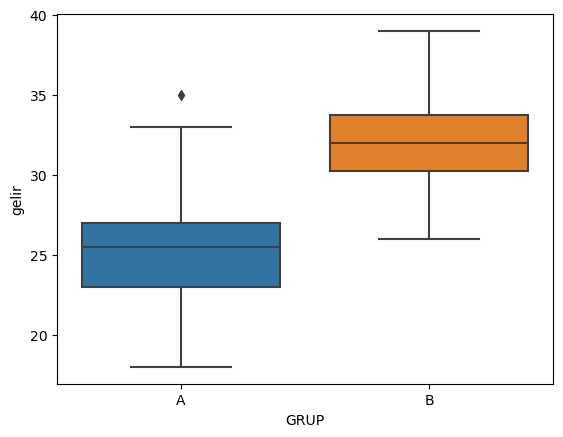

In [8]:
import seaborn as sns
sns.boxplot(x = "GRUP", y = "gelir", data = AB);

# Varsayim Kontrolü

In [10]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [11]:
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


### Normallik Varsayımı

In [26]:
from scipy.stats import shapiro

In [13]:
shapiro(A_B.A)

ShapiroResult(statistic=0.9789243936538696, pvalue=0.7962851524353027)

In [14]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9561262130737305, pvalue=0.24584470689296722)

### Varyans Homojenliği Varsayımı

* H0: Varyanslar homojendir.
* H1: Varyanslar homojen değildir.

In [27]:
import scipy.stats as stats

In [28]:
stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

# Hipotez Testi

In [29]:
stats.ttest_ind(A_B["A"],A_B["B"], equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [31]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"],A_B["B"], equal_var = True)
print("Test İstatistiği = %.4f, p-değeri = %.4f" % (test_istatistigi, pvalue))

Test İstatistiği = -7.0287, p-değeri = 0.0000


# NonParametrik Bağımsız İki Örneklem T Testi 

* Varsayalım ki varsayım testlerimiz negatif çıktı yani hem normallik varsayımı hem homojenlik varsayımı karşılanmıyor.

In [32]:
stats.mannwhitneyu(A_B["A"],A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

In [33]:
test_istatistigi, pvalue = stats.mannwhitneyu(A_B["A"],A_B["B"])
print("Test İstatistiği = %.4f, p-değeri = %.4f" % (test_istatistigi, pvalue))

Test İstatistiği = 89.5000, p-değeri = 0.0000
